In [20]:
import numpy as np
import torch
import math
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import GPyOpt
import GPy
import random

import os

import matplotlib as mpl
import matplotlib.tri as tri

import ternary
import pickle
import datetime
import joblib 

from collections import Counter
import matplotlib.ticker as ticker

import pyDOE
import random
from scipy.stats import norm

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn import decomposition
import plotly
import plotly.graph_objects as go
import plotly.express as px

In [3]:
rs = 0

In [4]:
cd /Users/Liangqiaohao/Desktop/PV Lab/2020/March/Learning project/P3HT

/Users/Liangqiaohao/Desktop/PV Lab/2020/March/Learning project/P3HT


In [5]:
dataset_P3HT = pd.read_csv(r'/Users/Liangqiaohao/Desktop/PV Lab/2020/March/Learning project/P3HT/P3HT_dataset.csv')
X_P3HT = dataset_P3HT.iloc[:,5:10]
# i put negative sign here because default BO is for minimization
X_P3HT['Conductivity'] = -dataset_P3HT.iloc[:,13].values

X_run_P3HT = X_P3HT.groupby(['P3HT content (%)', 'D1 content (%)','D2 content (%)','D6 content (%)','D8 content (%)'])['Conductivity'].agg(lambda x: x.unique().mean())
X_run_P3HT = (X_run_P3HT.to_frame()).reset_index()

s_scaler = preprocessing.StandardScaler()
X_P3HT_normalized_values = s_scaler.fit_transform(X_run_P3HT[['P3HT content (%)', 'D1 content (%)', 'D2 content (%)','D6 content (%)', 'D8 content (%)', 'Conductivity']].values)
X_P3HT_normalized = pd.DataFrame(X_P3HT_normalized_values, columns = ['P3HT content (%)', 'D1 content (%)', 'D2 content (%)','D6 content (%)', 'D8 content (%)', 'Conductivity'])


In [6]:
cd /Users/Liangqiaohao/Desktop/PV Lab/2020/March/Learning project/3D printing

/Users/Liangqiaohao/Desktop/PV Lab/2020/March/Learning project/3D printing


In [7]:
dataset_3D = pd.read_csv(r'/Users/Liangqiaohao/Desktop/PV Lab/2020/March/Learning project/3D printing/parameterspace.csv')
X_3D = dataset_3D.iloc[:,0:5]
# i put negative sign here because default BO is for minimization
X_3D['toughness'] = -dataset_3D.iloc[:,5].values
X_run_3D = X_3D.groupby(['n', 'theta','r','t'])['toughness'].agg(lambda x: x.unique().mean())
X_run_3D = (X_run_3D.to_frame()).reset_index()

X_3D_normalized_values = s_scaler.fit_transform(X_run_3D[['n', 'theta','r','t', 'toughness']].values)
X_3D_normalized = pd.DataFrame(X_3D_normalized_values, columns = ['n', 'theta','r','t', 'toughness'])


In [8]:
cd /Users/Liangqiaohao/Desktop/PV Lab/2020/March/Learning project/AgNN

/Users/Liangqiaohao/Desktop/PV Lab/2020/March/Learning project/AgNN


In [9]:
dataset_AgNN = pd.read_csv(r'/Users/Liangqiaohao/Desktop/PV Lab/2020/March/Learning project/AgNN/AgBO_loss.csv')
X_AgNN = dataset_AgNN.iloc[:,4:10]

X_run_AgNN = X_AgNN.groupby(['QAgNO3(%)', 'Qpva(%)', 'Qtsc(%)', 'Qseed(%)', 'Qtot(uL/min)'])['loss'].agg(lambda x: x.unique().mean())
X_run_AgNN = (X_run_AgNN.to_frame()).reset_index()

X_AgNN_normalized_values = s_scaler.fit_transform(X_run_AgNN[['QAgNO3(%)', 'Qpva(%)', 'Qtsc(%)', 'Qseed(%)', 'Qtot(uL/min)', 'loss']].values)
X_AgNN_normalized = pd.DataFrame(X_AgNN_normalized_values, columns = ['QAgNO3(%)', 'Qpva(%)', 'Qtsc(%)', 'Qseed(%)', 'Qtot(uL/min)', 'loss'])


In [10]:
cd /Users/Liangqiaohao/Desktop/PV Lab/2020/March/Learning project/C2a

/Users/Liangqiaohao/Desktop/PV Lab/2020/March/Learning project/C2a


In [11]:
dataset_C2a = pd.read_excel(r'/Users/Liangqiaohao/Desktop/PV Lab/2020/March/Learning project/C2a/C2a learning study.xlsx')
X_C2a = dataset_C2a.iloc[:,0:5]

X_run_C2a = X_C2a.groupby(['CsPbI', 'MAPbI', 'FAPbI'])['Instability index'].agg(lambda x: x.unique().mean())
X_run_C2a = (X_run_C2a.to_frame()).reset_index()

X_C2a_normalized_values = s_scaler.fit_transform(X_run_C2a[['CsPbI', 'MAPbI', 'FAPbI', 'Instability index']].values)
X_C2a_normalized = pd.DataFrame(X_C2a_normalized_values, columns = ['CsPbI', 'MAPbI', 'FAPbI', 'Instability index'])


In [12]:
cd /Users/Liangqiaohao/Desktop/PV Lab/2020/March/Learning project/ARES

/Users/Liangqiaohao/Desktop/PV Lab/2020/March/Learning project/ARES


In [13]:
dataset = pd.read_csv(r'/Users/Liangqiaohao/Desktop/PV Lab/2020/March/Learning project/ARES/(Use this)2019-11-21.csv')
X_ARES = dataset.iloc[:,0:5]
X_ARES['Score'] = -dataset.iloc[:,4].values

X_run_ARES = X_ARES.groupby(['Prime Delay', 'Print Speed', 'X Offset Correction', 'Y Offset Correction'])['Score'].agg(lambda x: x.unique().mean())
X_run_ARES = (X_run_ARES.to_frame()).reset_index()

X_ARES_normalized_values = s_scaler.fit_transform(X_run_ARES[['Prime Delay', 'Print Speed', 'X Offset Correction', 'Y Offset Correction', 'Score']].values)
X_ARES_normalized = pd.DataFrame(X_ARES_normalized_values, columns = ['Prime Delay', 'Print Speed', 'X Offset Correction', 'Y Offset Correction', 'Score'])


In [14]:
# go to a directory you want to save the GP models

In [15]:
cd /Users/Liangqiaohao/Desktop/PV Lab/2020/March/Learning project

/Users/Liangqiaohao/Desktop/PV Lab/2020/March/Learning project


In [16]:
# P3HT
# s_scaler = preprocessing.StandardScaler()
# X_P3HT_normalized_values_ONCE = s_scaler.fit_transform(X_P3HT[['P3HT content (%)', 'D1 content (%)', 'D2 content (%)','D6 content (%)', 'D8 content (%)', 'Conductivity']].values)
# X_P3HT_normalized_ONCE = pd.DataFrame(X_P3HT_normalized_values_ONCE, columns = ['P3HT content (%)', 'D1 content (%)', 'D2 content (%)','D6 content (%)', 'D8 content (%)', 'Conductivity'])
# print(X_P3HT_normalized_ONCE.shape)
XX_P3HT = X_P3HT[['P3HT content (%)', 'D1 content (%)', 'D2 content (%)','D6 content (%)', 'D8 content (%)']].values
yy_P3HT = X_P3HT['Conductivity'].values

ARD_ = False

Bias_kernel = GPy.kern.Bias(XX_P3HT.shape[1], variance=1.)

Matern52_kernel = GPy.kern.Matern52(XX_P3HT.shape[1], variance=1., ARD=ARD_) + Bias_kernel
Matern32_kernel = GPy.kern.Matern32(XX_P3HT.shape[1], variance=1., ARD=ARD_) + Bias_kernel
Expo_kernel = GPy.kern.Exponential(XX_P3HT.shape[1], variance=1., ARD=ARD_) + Bias_kernel
RBF_kernel = GPy.kern.RBF(XX_P3HT.shape[1], variance=1., ARD=ARD_) + Bias_kernel
MLP_kernel = GPy.kern.MLP(XX_P3HT.shape[1], variance=1., ARD=ARD_) + Bias_kernel

In [17]:
P3HT_GP_model = GPy.models.GPRegression(X = np.array(XX_P3HT), 
                                   Y = np.array([[i] for i in yy_P3HT]), 
                                   kernel= Matern52_kernel,
                                   noise_var = 0.01
                                  )
P3HT_GP_model.optimize_restarts(num_restarts=10,
                                   parallel = True,
                                   robust = True,
                                   optimizer = 'bfgs',
                                   max_iters=100,
                                   verbose = False,
                                   messages = True)
        

In [ ]:
# to save
joblib.dump(P3HT_GP_model, 'P3HT_GP_model.pkl') 
# to load
# P3HT_from_joblib = joblib.load('P3HT_GP_model.pkl') 

In [ ]:
##############################################################################################

In [131]:
# C2a
# s_scaler = preprocessing.StandardScaler()
# X_C2a_normalized_values_ONCE = s_scaler.fit_transform(X_C2a[['CsPbI', 'MAPbI', 'FAPbI', 'Instability index']].values)
# X_C2a_normalized_ONCE = pd.DataFrame(X_C2a_normalized_values_ONCE, columns = ['CsPbI', 'MAPbI', 'FAPbI', 'Instability index'])
# print(X_C2a_normalized_ONCE.shape)
XX_C2a = X_C2a[['CsPbI', 'MAPbI', 'FAPbI']].values
yy_C2a = X_C2a['Instability index'].values

ARD_ = False

Bias_kernel = GPy.kern.Bias(XX_C2a.shape[1], variance=1.)

Matern52_kernel = GPy.kern.Matern52(XX_C2a.shape[1], variance=1., ARD=ARD_) + Bias_kernel
Matern32_kernel = GPy.kern.Matern32(XX_C2a.shape[1], variance=1., ARD=ARD_) + Bias_kernel
Expo_kernel = GPy.kern.Exponential(XX_C2a.shape[1], variance=1., ARD=ARD_) + Bias_kernel
RBF_kernel = GPy.kern.RBF(XX_C2a.shape[1], variance=1., ARD=ARD_) + Bias_kernel
MLP_kernel = GPy.kern.MLP(XX_C2a.shape[1], variance=1., ARD=ARD_) + Bias_kernel

In [132]:
C2a_GP_model = GPy.models.GPRegression(X = np.array(XX_C2a), 
                                   Y = np.array([[i] for i in yy_C2a]), 
                                   kernel= Matern52_kernel,
                                   noise_var = 0.01
                                  )
C2a_GP_model.optimize_restarts(num_restarts=10,
                                   parallel = True,
                                   robust = True,
                                   optimizer = 'bfgs',
                                   max_iters=100,
                                   verbose = False,
                                   messages = True)

In [ ]:
# to save
joblib.dump(C2a_GP_model, 'C2a_GP_model.pkl') 
# to load
# C2a_from_joblib = joblib.load('C2a_GP_model.pkl') 

In [133]:
def plot_tri(X_Cs, X_MA, X_FA, X_instability, name, scatter):
    colormap = 'RdBu_r'
    
    a = X_FA
    b = X_Cs
    c = X_MA

    x = 0.5 * ( 2.*b+c ) / ( a+b+c )
    y = 0.5*np.sqrt(3) * c / (a+b+c)

    T = tri.Triangulation(x,y)

    mpl.rcParams.update({'font.size': 22})
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fig.set_figheight(5)
    fig.set_figwidth(7)

    lims = [np.min(X_instability), np.max(X_instability)]
    norm = matplotlib.colors.Normalize(vmin=lims[0], vmax=lims[1])
    im=ax.tricontourf(x,y,T.triangles,X_instability)
    im.set_norm(norm)
    
#     ax.scatter(x, y)

    corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
    triangle = tri.Triangulation(corners[:, 0], corners[:, 1])
    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=3)

    im2 = ax.triplot(trimesh,'k--')
    
    if scatter == True:
        im3 = ax.scatter(x, y, s=20, c=np.ravel(X_instability), cmap=colormap, 
                         alpha=1, zorder=2, norm=norm)

    myformatter=matplotlib.ticker.ScalarFormatter()
    myformatter.set_powerlimits((1,2))
    cbar=plt.colorbar(im, ax=ax, format=myformatter)
    cbar.set_label('Instability Index (a.u.)', fontsize=14)
    plt.axis('off')
    plt.text(0.35,-0.08,'CsPbI (%)', fontsize=14)
    plt.text(0.1,0.33,'FAPbI (%)', rotation=62, fontsize=14)
    plt.text(0.77,0.29,'MAPbI (%)', rotation=-62, fontsize=14)
    # plt.text(0.35,0.95,'Round '+str(i))
    plt.text(-0.01, -0.06, '0', fontsize=14)#-0.02, -0.06
    plt.text(0.90, -0.06, '1', fontsize=14)#093 -006
    plt.text(-0.06, 0.02, '1', fontsize=14, rotation=62)
    plt.text(0.41, 0.85, '0', fontsize=14, rotation=62)
    plt.text(0.98, 0.02, '0', fontsize=14, rotation=-62)
    plt.text(0.51, 0.85, '1', fontsize=14, rotation=-62)

    plt.show()
    
    print('This is the '+name)

In [134]:
materials = ['CsPbI', 'MAPbI', 'FAPbI']
X_feature = X_C2a[['CsPbI', 'MAPbI', 'FAPbI']]
X_Cs = np.array(X_C2a['CsPbI'].values)
X_FA = np.array(X_C2a['FAPbI'].values)
X_MA = np.array(X_C2a['MAPbI'].values)
X_instability = np.array(X_C2a_normalized_ONCE['Instability index'].values)

In [135]:
grid_linspace = np.linspace(0, 1, 101)
grid_array = np.array([999, 999, 999])

for i in grid_linspace:
    for j in grid_linspace:
        for k in grid_linspace:
            x = np.array([i, j, k])
            if i + j + k == 1:
                grid_array = np.vstack((grid_array, x))
grid_array = grid_array[1:]

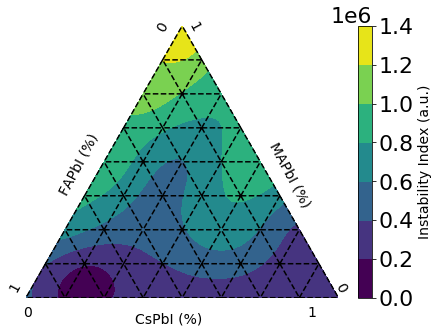

This is the GP model


In [136]:
plot_tri(grid_array[:,0],grid_array[:,1],grid_array[:,2], C2a_GP_model.predict(grid_array)[0][:,0], 'GP model', False)

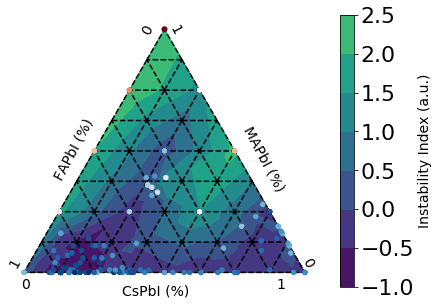

This is the raw experimental


In [137]:
plot_tri(X_Cs, X_MA, X_FA, X_instability, 'raw experimental', True)

In [ ]:
########################################################################################

In [147]:
# AgNN

X_AgNN['Qtot(uL/min)'] = X_AgNN['Qtot(uL/min)'] / 30

XX_AgNN = X_AgNN[['QAgNO3(%)', 'Qpva(%)', 'Qtsc(%)', 'Qseed(%)', 'Qtot(uL/min)']].values
yy_AgNN = X_AgNN['loss'].values
print(XX_AgNN.shape)

ARD_ = False

Bias_kernel = GPy.kern.Bias(XX_AgNN.shape[1], variance=1.)

Matern52_kernel = GPy.kern.Matern52(XX_AgNN.shape[1], variance=1., ARD=ARD_) + Bias_kernel

(3295, 5)


In [150]:
AgNN_GP_model = GPy.models.GPRegression(X = np.array(XX_AgNN), 
                                   Y = np.array([[i] for i in yy_AgNN]), 
                                   kernel= Matern52_kernel,
                                   noise_var = 0.01
                                  )
AgNN_GP_model.optimize_restarts(num_restarts=10,
                                   parallel = True,
                                   robust = True,
                                   optimizer = 'bfgs',
                                   max_iters=100,
                                   verbose = False,
                                   messages = True)

Process ForkPoolWorker-82:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 411, in _recv_bytes
    return self._recv(size)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


Ctrl+c received, terminating and joining pool.


EOFError: Ran out of input

In [ ]:
# to save
joblib.dump(AgNN_GP_model, 'AgNN_GP_model.pkl') 
# to load
# AgNN_from_joblib = joblib.load('AgNN_GP_model.pkl') 

In [ ]:
###############################################################################

In [151]:
# ARES
XX_ARES = X_ARES[['Prime Delay', 'Print Speed', 'X Offset Correction', 'Y Offset Correction']].values
yy_ARES = X_ARES['Score'].values
print(X_ARES.shape)

ARD_ = False

Bias_kernel = GPy.kern.Bias(XX_ARES.shape[1], variance=1.)

Matern52_kernel = GPy.kern.Matern52(XX_ARES.shape[1], variance=1., ARD=ARD_) + Bias_kernel

(100, 5)


In [152]:
ARES_GP_model = GPy.models.GPRegression(X = np.array(XX_ARES), 
                                   Y = np.array([[i] for i in yy_ARES]), 
                                   kernel= Matern52_kernel,
                                   noise_var = 0.01
                                  )
ARES_GP_model.optimize_restarts(num_restarts=10,
                                   parallel = True,
                                   robust = True,
                                   optimizer = 'bfgs',
                                   max_iters=100,
                                   verbose = False,
                                   messages = True)

In [ ]:
# to save
joblib.dump(ARES_GP_model, 'ARES_GP_model.pkl') 
# to load
# ARES_from_joblib = joblib.load('ARES_GP_model.pkl') 

In [ ]:
###################################################################################

In [ ]:
# 3D Printing
# s_scaler = preprocessing.StandardScaler()
# X_3D_normalized_values_ONCE = s_scaler.fit_transform(X_3D[['n', 'theta','r','t', 'toughness']].values)
# X_3D_normalized_ONCE = pd.DataFrame(X_3D_normalized_values_ONCE, columns = ['n', 'theta','r','t', 'toughness'])
# print(X_3D_normalized_ONCE.shape)
XX_Printing = X_3D[['n', 'theta','r','t']].values
yy_Printing = X_3D['toughness'].values
print(XX_3D.shape)

ARD_ = False

Bias_kernel = GPy.kern.Bias(XX_Printing.shape[1], variance=1.)

Matern52_kernel = GPy.kern.Matern52(XX_Printing.shape[1], variance=1., ARD=ARD_) + Bias_kernel

In [ ]:
Printing_GP_model = GPy.models.GPRegression(X = np.array(XX_Printing), 
                                   Y = np.array([[i] for i in yy_Printing]), 
                                   kernel= Matern52_kernel,
                                   noise_var = 0.01
                                  )
Printing_GP_model.optimize_restarts(num_restarts=10,
                                   parallel = True,
                                   robust = True,
                                   optimizer = 'bfgs',
                                   max_iters=100,
                                   verbose = False,
                                   messages = True)

In [ ]:
# to save
joblib.dump(Printing_GP_model, 'Printing_GP_model.pkl') 
# to load
# Printing_from_joblib = joblib.load('Printing_GP_model.pkl')

In [ ]:
###################################################################################